# On Potential Applications in Natural Language Processing

Paul M. Washburn

## Introduction

**Universal Sentence Embedding** is a state-of-the-art practice that emerged in 2018 as an effective practice in natural language machine learning tasks.

Both word & sentence embeddings are transfer learning techniques that convert variable-length text sequences into fixed-length dense vectors of real numbers that represent the original data in a more [contextually aware manner](https://aclweb.org/aclwiki/Distributional_Hypothesis).  Universal embeddings are of interest to the community due to the fact that machine learning algorithms in general, and in particular neural networks, play nicely with the dense numeric vectors produced by the embedding process.  The approach also supplies context when larger volumes of data are unavailable, helping ease the burden of data collection and data labeling.

Over the last couple of years there has been a movement towards **Universal Embeddings** as opposed to context-specific embeddings.  Most notably, Google has published two encoders for this purpose.  These encoders are pre-trained and ready-for-use in downstream machine learning workflows.  Transforming sentences with these encoders often confers a qualitative improvement in NLP classification (and similar) tasks due to the fact that they are derived from a large corpus of examples.

## Potential Use Cases

Some downstream machine learning workflows that might benefit from universal embeddings include:

- Sentiment analysis
- Classification tasks
- Translation tasks
- Unsupervised learning
- Visualization 

The enrichment of natural language text data via embeddings has had considerable success, so we will explore the reasons for that success as well as some applications of the technology.

## Word Embeddings

Since sentence embeddings are an extension on the concept of *Word Embeddings* let us briefly examine what they are.  

Both word & sentence embeddings are a form of [*Transfer Learning*](https://en.wikipedia.org/wiki/Transfer_learning), or the transference of knowledge learned from one domain to another (related) domain.  For example, a model built to recognize cars in a traffic video stream could be re-used in for a model built for recognizing trucks. 

---------------------------------------------------------------
## What Is An *Embedding*?

[Google's TensorFlow documentation](https://www.tensorflow.org/guide/embedding) states: *An embedding is a mapping from discrete objects, such as words, to vectors of real numbers.*

```python
## For example, a 300-dimensional embedding for English words could include:
blue:  (0.01359, 0.00075997, 0.24608, ..., -0.2524, 1.0048, 0.06259)
blues:  (0.01396, 0.11887, -0.48963, ..., 0.033483, -0.10007, 0.1158)
orange:  (-0.24776, -0.12359, 0.20986, ..., 0.079717, 0.23865, -0.014213)
oranges:  (-0.35609, 0.21854, 0.080944, ..., -0.35413, 0.38511, -0.070976)
```

*Embedding functions are the standard and effective way to transform such discrete input objects into useful continuous vectors.*

*The individual dimensions in these vectors have no inherent meaning.  The overall patterns of location and distance between vectors, however, are highly valuable in machine learning tasks.  For example the Euclidean distance or angle between vectors can be easily derived for a sort of nearest-neighbor analysis:*

```python
blue:  (red, 47.6°), (yellow, 51.9°), (purple, 52.4°)
blues:  (jazz, 53.3°), (folk, 59.1°), (bluegrass, 60.6°)
orange:  (yellow, 53.5°), (colored, 58.0°), (bright, 59.9°)
oranges:  (apples, 45.3°), (lemons, 48.3°), (mangoes, 50.4°)
```
---------------------------------------------------------------

## A Brief History of Word Embeddings

The concept of word embeddings began with two projects by Google and Stanford called [word2vec](https://github.com/dav/word2vec/) and [GloVe - Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/).  Both approaches are unsupervised approaches that are based on the [distributional hypothesis](https://aclweb.org/aclwiki/Distributional_Hypothesis) (words that co-occur tend to have similar meanings).  These approaches were superceded by [FastText](https://github.com/facebookresearch/fastText) and [ELMo](http://allennlp.org/elmo) that have greater tolerance for out-of-vocabulary n-grams and character features.  These advancements appear to have spurred an increased rate of innovation in this space in recent months, leading to exciting advancements such as universal embeddings. All this work naturally culminates on the topic of this presentation, [Google's Universal Sentence Encoder](https://arxiv.org/pdf/1803.11175.pdf).

---------------------------------------------------------------

### Word Embeddings at Pinnacol

Below are some custom word embeddings trained on data here at Pinnacol.  The links navigate to simple applications where the user can input a word, and then the `n_most_similar` words are returned (based on the corpus that the model was trained upon).  Compare inputting the same words into each model and contemplate the results.  

Note that these links will only work from your machine at Pinnacol. 

- [Business Description Word Embeddings](http://advancedanalyticsdemo.pinnacol.com/word-embeddings)
- [Claim Rep Notes Word Embeddings](http://advancedanalyticsdemo.pinnacol.com/claim-rep-word-embeddings)

## From Word Embeddings to Sentence Embeddings

The community has come a long way since [word2vec](https://code.google.com/archive/p/word2vec/) first came on the scene.  There are many competing schemes for taking word embeddings and transforming them into sentence embeddings.  The simple heuristic of taking a sentence's word vectors' average is generally accepted as a strong approach in spite of its simplicity.  However there is a lot of exciting research in this area that includes supervised, unsupervised approaches, and ensemble approaches.  

## Google's Universal Sentence Encoder

In early 2018 Google made available two universal sentence encoders (via TensorFlow Hub) that are trained on massive amounts of data from a variety of sources in order to get broad enough coverage to be useful in the widest possible range of applications.  The availability of these tools makes it easy for data scientists to access sentence-level embeddings as easy as it has historically been to lookup individual word embeddings.  The embeddings returned by this free-to-use-tool are approximately normalized, which is ideal for use in machine learning tasks. 

Of the two models, one leverages the design from [Vaswani *et al*, 2017](https://arxiv.org/pdf/1706.03762.pdf), while the other uses a [Deep Averaging Network from Iyyer *et al*, 2015](https://github.com/miyyer/dan) as its architecture.  The first targets high accuracy at the cost of greater model complexity and resource consumption; the latter targets efficient prediction the a cost of reduced accuracy.  

## Exploration of Potential Applications

First we explore performing a simple K-Means clustering analysis, using as data the lines of an American classic novel - Henry David Thoreau's *Walden*.  The work has 18 chapters and thus (to make thing simple), 18 clusters were chosen *a priori* as a test to see how well clusters form when visualized using a [t-SNE (t-Distributed Stochastic Neighbor Embedding)](https://lvdmaaten.github.io/tsne/) visualizer.  The same visualization technique was used to compare the results from the universal embeddings transformer to a more traditional approach, [TF-IDF](http://www.tfidf.com/).  We see that the clusters from the embeddings are more evenly spaced relative to intra-and-inter-cluster data points when compared to the results from TF-IDF.  

Next we explore the ARTHUR data that was used in a recent Pinnacol Kaggle competition.  ARTHUR is an classification model that was originally built by Cake's John Stevenson that is used to classify new applicants for insurance into their NCCI industry code based solely on their description of their operations.  

First, some installs.  Below we install some necessary installs that GCP doesn't have native in Data Lab.  If you cloned the repository for this presentation then you can simply run `pip install -r requirements.txt` in the shell pointing to the local copy of this repo.  

In [1]:
!pip install tensorflow_hub
!pip install yellowbrick
!git clone https://github.com/facebookresearch/fastText.git
!pip install Cython
!pip install fastText
!pip install keras
!pip install spacy
!pip install tld
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz
!git clone https://github.com/reiinakano/scikit-plot.git
!pip install scikit-plot
!pip install gensim
!python -m spacy download en_core_web_sm

  Using cached https://files.pythonhosted.org/packages/5a/76/18c9aaf24f1b888bafa40351493815050e100098b4782d634b307fb1ebc8/tensorflow_hub-0.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f0/b3/fffa077157c38e729eb033fdd0ad57fbe92db1aac303c69b283ce10deb9b/yellowbrick-0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/d9/bea927c86bf78d583d517f24cbc87606cb333bfb3a5c99cb85b547305f0f/scikit_learn-0.20.2-cp35-cp35m-manylinux1_x86_64.whl
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
fatal: destination path 'fastText' already exists and is not an empty directory.
  Using cached https://files.pythonhosted.org/packages/2f/a3/ab68c915773126ef8d07d35b041d47a27ace46383b0733e1cca3bec89e74/Cython-0.29.3-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16

tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.2 which is incompatible.
tensorboard 1.8.0 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.
thinc 6.12.1 has requirement dill<0.3.0,>=0.2.7, but you'll have dill 0.2.6 which is incompatible.
  Found existing installation: numpy 1.14.0
    Uninstalling numpy-1.14.0:
      Successfully uninstalled numpy-1.14.0
  Using cached https://files.pythonhosted.org/packages/8c/71/e38f620b4afffabaa447c3639ff0066fa862973d48797b8b4bdaced33133/tld-0.9.2-py2.py3-none-any.whl
    100% |████████████████████████████████| 37.4MB 936kB/s eta 0:00:01
  Running setup.py bdist_wheel for en-core-web-sm ... done
  Stored in directory: /content/.cache/pip/wheels/54/7c/d8/f86364af8fbba7258e14adae115f18dd2c91552406edc3fdaa
Successfully built en-core-web-sm
fatal: destination path 'scikit-plot' already exists and is not an empty directory.
  Using cached https://files.pythonhosted.org/packages/7c/47/

  Using cached https://files.pythonhosted.org/packages/a8/8a/730acf258088f2b0615e1bf6acaa63e336a97b6eeb41ce4c5b7e8b636476/boto3-1.9.86-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b7/31/05c8d001f7f87f0f07289a5fc0fc3832e9a57f2dbd4d3b0fee70e0d51365/jmespath-0.9.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d7/af/fd9c0f1f0fdc03d3367a56f35093f8b1020ba1a97ead9fa580156895944b/botocore-1.12.86-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d7/14/2a0004d487464d120c9fb85313a75cd3d71a7506955be458eebfe19a6b1d/s3transfer-0.1.13-py2.py3-none-any.whl

    Linking successful
    /usr/local/envs/py3env/lib/python3.5/site-packages/en_core_web_sm -->
    /usr/local/envs/py3env/lib/python3.5/site-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



Below we import a bunch of python libraries as well as define some settings, functions and classes.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
import tensorflow as tf
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import TSNEVisualizer
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras import models, layers
from keras.callbacks import EarlyStopping
import re
import string
from time import time
import spacy
from tld import get_tld
import gensim

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline
mpl.rcParams['figure.figsize'] = (17, 10)
spacy.load("en_core_web_sm")


# CLASS & HELPER FUNCTION DEFINITIONS
class TextCleaner(TransformerMixin):
    """Text cleaning to slot into sklearn interface"""

    def __init__(self, remove_stopwords=True, remove_urls=True,
                 remove_puncts=True, lemmatize=True, extra_punct='',
                 custom_stopwords=[], custom_non_stopwords = [],
                 verbose=True, parser='big'):
        """
        DESCR:
        INPUT: remove_stopwords - bool - remove is, there, he etc...
               remove_urls - bool - 't www.monkey.com t' --> 't com t'
               remove_punct - bool - all punct and digits gone
               lemmatize - bool - whether to apply lemmtization
               extra_punct - str - other characters to remove
               custom_stopwords - list - add to standard stops
               custom_non_stopwords - list - make sure are kept
               verbose - bool - whether to print progress statements
               parser - str - 'big' or small, one keeps more, and is slower
        OUTPUT: self - **due to other method, not this one
        """
        # Initialize passed Attributes to specify operations
        self.remove_stopwords = remove_stopwords
        self.remove_urls = remove_urls
        self.remove_puncts = remove_puncts
        self.lemmatize = lemmatize

        # Change how operations work
        self.custom_stopwords = custom_stopwords
        self.custom_non_stopwords = custom_non_stopwords
        self.verbose = verbose

        # Set up punctation tranlation table
        self.removals = string.punctuation + string.digits + extra_punct
        self.trans_table = str.maketrans({key: None for key in self.removals})

        #Load nlp model for parsing usage later
        self.parser = spacy.load('en_core_web_sm', 
                                 disable=['parser','ner','textcat'])
        #from spacy.lang.en import English
        if parser == 'small': self.parser = spacy.load('en')#English()

        #Add custom stop words to nlp
        for word in self.custom_stopwords:
            self.parser.vocab[word].is_stop = True

        #Set custom nlp words to be kept
        for word in self.custom_non_stopwords:
            self.parser.vocab[word].is_stop = False


    def transform(self, X, y=None):
        """take array of docs to clean array of docs"""
        # Potential replace urls with tld ie www.monkey.com to com
        if self.remove_urls:
            start_time = time()
            if self.verbose:
                print("CHANGING URLS to TLDS...  ", end='')
            X = [self.remove_url(doc) for doc in X]

        # Potentially remove punctuation
        if self.remove_puncts:
            start_time = time()
            if self.verbose:
                print("REMOVING PUNCTUATION AND DIGITS... ", end='')
            X = [doc.lower().translate(self.trans_table) for doc in X]

        # Using Spacy to parse text
        start_time = time()
        if self.verbose:
            print("PARSING TEXT WITH SPACY... ", end='')
        #X = list(self.nlp.pipe(X))
        X = list(self.parser.pipe(X))

        # Potential stopword removal
        if self.remove_stopwords:
            start_time = time()
            if self.verbose:
                print("REMOVING STOP WORDS FROM DOCUMENTS... ", end='')
            X = [[word for word in doc if not word.is_stop] for doc in X]


        # Potential Lemmatization
        if self.lemmatize:
            start_time = time()
            if self.verbose:
                print("LEMMATIZING WORDS... ", end='')
            X = [[word.lemma_ for word in doc] for doc in X]

        # Put back to normal if no lemmatizing happened
        if not self.lemmatize:
            X = [[str(word).lower() for word in doc] for doc in X]

        # Join Back up
        return [' '.join(lst) for lst in X]


    def fit(self, X, y=None):
        """interface conforming, and allows use of fit_transform"""
        return self


    @staticmethod
    def remove_url(text):
        """
        DESCR: given a url string find urls and replace with top level domain
               a bit lazy in that if there are multiple all are replaced by first
        INPUT: text - str - 'this is www.monky.com in text'
        OUTPIT: str - 'this is <com> in text'
        """
        # Define string to match urls
        url_re = '((?:www|https?)(://)?[^\s]+)'

        # Find potential things to replace
        matches = re.findall(url_re, text)
        if matches == []:
            return text

        # Get tld of first match
        match = matches[0][0]
        try:
            tld = get_tld(match, fail_silently=True, fix_protocol=True)
        except ValueError:
            tld = None

        # failures return none so change to empty
        if tld is None:
            tld = ""

        # Make replacements and return
        return re.sub(url_re, tld, text)
      

def plot_accuracy_loss(history_obj, width=16):
    '''
    Leans on Keras' history.history object to visualize fit of model.
    '''
    plt.clf()
    loss = history_obj['loss']
    val_loss = history_obj['val_loss']
    d_loss = np.subtract(loss, val_loss)
    acc = history_obj['acc']
    val_acc = history_obj['val_acc']
    d_acc = np.subtract(acc, val_acc)
    epochs = range(1, len(loss)+1)
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(1, 2, figsize=(width, 6))
    ax[0].plot(epochs, loss, 'g', label='Training Loss', linestyle='--')
    ax[0].plot(epochs, val_loss, 'b', label='Validation Loss', linestyle='-.')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Loss')
    ax[0].grid(alpha=0.3)
    ax[0].legend(loc='best')
    ax[1].plot(epochs, acc, 'g', label='Training Accuracy', linestyle='--')
    ax[1].plot(epochs, val_acc, 'b', label='Validation Accuracy', linestyle='-.')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Accuracy')
    ax[1].grid(alpha=0.3)
    ax[1].legend(loc='best')
    sns.despine()
    plt.suptitle('Training vs. Validation of Sequential Network Model Over Various Epochs')
    fig2, ax2 = plt.subplots(1, 2, figsize=(width, 3))
    ax2[0].plot(epochs, d_loss, c='black', label='train_loss - val_loss')
    ax2[0].grid(alpha=0.3)
    ax2[0].set_xlabel('Epochs')
    ax2[0].set_ylabel('Loss Differential (Train-Val)')
    ax2[0].legend(loc='best')
    ax2[0].axhline(0, c='black', linestyle=':')
    ax2[0].set_title('Difference of Curves Above')
    ax2[1].plot(epochs, d_acc, c='black', label='train_accuracy - val_accuracy')
    ax2[1].grid(alpha=0.3)
    ax2[1].set_xlabel('Epochs')
    ax2[1].set_ylabel('Accuracy Differential (Train-Val)')
    ax2[1].legend(loc='best')
    ax2[1].axhline(0, c='black', linestyle=':')
    ax2[1].set_title('Difference of Curves Above')
    sns.despine()
    plt.show()
    return None
  
def multiclass_confusion_matrix(y, yhat, model_name='unspecified',
                               verbose=0):
    '''
    Inputs:
    ------------------------------------------------------
    y: true labels 
    yhat: predicted labels 
    model_name: name of model for printing
    
    Outputs:
    ------------------------------------------------------
    cm: confusion matrix (easily readable)
    metrics: dict of metrics on multiclass classification
    '''
    # organize confusion matrix from sklearn into readable format
    sk_confusion_matrix = confusion_matrix(y, yhat).transpose()#; print(sk_confusion_matrix)
    
    # put in pd.DataFrame and add names
    cm = pd.DataFrame(sk_confusion_matrix)
    IX = ['Test_' + str(i+1) for i in cm.index]
    COLS = ['Condition_' + str(i+1) for i in cm.columns]
    cm.columns, cm.index = COLS, IX
    
    # add totals
    cm['Total'] = cm.sum(axis=1)
    cm.loc['Total'] = cm.sum(axis=0)
    
    # get performance scores
    N = cm.loc['Total', 'Total']
    TP = np.diag(cm.loc[IX, COLS]).sum()
    ACC = np.divide(TP, N)
    MCR = 1 - ACC
    
    if verbose:
        print('''
        Confusion Matrix for Model: %s
        ------------------------------------------------------''' %model_name)
        print(cm)
        print('''
        Metrics for Model: %s
        ------------------------------------------------------
        Accuracy Rate = %.5f
        Misclassification Rate = %.5f
        ''' %(model_name, ACC, MCR))
        return None

    return cm

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Clustering of *Walden* by Thoreau

As a fun first example we explore clustering the lines from the book [Walden](https://en.wikiquote.org/wiki/Walden).  Each chapter in this book is topically-focused on some specific musing of Hendry David Thoreau during the two years he lived in the woods near Walden, Massachussetts.  The chapters are shown below:

```
1	Chapters
1.1	Chapter 1: Economy
1.2	Chapter 2: Where I Lived, and What I Lived For
1.3	Chapter 3: Reading
1.4	Chapter 4: Sounds
1.5	Chapter 5: Solitude
1.6	Chapter 6: Visitors
1.7	Chapter 7: The Bean-field
1.8	Chapter 8: The Village
1.9	Chapter 9: The Ponds
1.10	Chapter 10: Baker Farm
1.11	Chapter 11: Higher Laws
1.12	Chapter 12: Brute Neighbors
1.13	Chapter 13: House-Warming
1.14	Chapter 14: Former Inhabitants and Winter Visitors
1.15	Chapter 15: Winter Animals
1.16	Chapter 16: The Pond in Winter
1.17	Chapter 17: Spring
1.18	Chapter 18: Conclusion
```

The line of thinking in using this example is that the lines from these chapters will cluster into stronger and more meaningful clusters using Google's Universal Sentence Encoder than other, more traditional techniques.  While this is a poor test of such a theory (we do not evaluate the *quality of the clusters* or compare the clusters produced with their *ground truth* chapters) it is still instructive to see how the clusters turn out.  This is an unsupervised algorithm (assumes no knowledge of ground truth) and is a quick & dirty technique, so just roll with it.

A method called [t-SNE](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) is used to visualize the clusters that are produced from two transformations of the text: TF-IDF (the more traditional approach) and Google's sentence embeddings.  t-SNE is a technique for dimensionality reduction on high-dimensional datasets that is primarily used for visualizing high-dimensional datasets in two dimensions.  Here's a great YouTube [video from StatQuest (UNC Genetics Dept.)](https://www.youtube.com/watch?v=NEaUSP4YerM) on the subject. Since the sentence embeddings produced by the encoder have 512 dimensions and the TF-IDF features have as many dimensions as there are tokens in the encodings (which is guaranteed more than 512), t-SNE is a good option for a quick & dirty visualization of the clusters produced.  

In [26]:
def fetch_thoreau():
  with open("data/thoreau-walden.txt", "r") as f:
      lines = f.readlines()

  lines = [l for l in lines if l != "\n"]
  lines = [l for l in lines if len(l) > 10]
  lines = "".join(l for l in lines)
  lines = lines.split(". ")
  lines = [l.replace("\n", " ") for l in lines]
  
  return lines

lines = fetch_thoreau()
lines[:10]

['ON THE DUTY OF CIVIL DISOBEDIENCE by Henry David Thoreau  Where I Lived, and What I Lived For  The Bean-Field  The Village  The Ponds  Baker Farm  Higher Laws  Brute Neighbors  House-Warming  Former Inhabitants and Winter Visitors  Winter Animals  The Pond in Winter  Conclusion  ON THE DUTY OF CIVIL DISOBEDIENCE When I wrote the following pages, or rather the bulk of them, I lived alone, in the woods, a mile from any neighbor, in a house which I had built myself, on the shore of Walden Pond, in Concord, Massachusetts, and earned my living by the labor of my hands only',
 'I lived there two years and two months',
 'At present I am a sojourner in civilized life I should not obtrude my affairs so much on the notice of my readers if very particular inquiries had not been made by my townsmen concerning my mode of life, which some would call impertinent, though they do not appear to me at all impertinent, but, considering the circumstances, very natural and pertinent',
 'Some have asked wh

Below we define the function `fetch_universal_sentence_embeddings` that leverages Google's [TensorFlow](https://www.tensorflow.org/) to retrieve the encoder model and generate the subsequent embeddings from that model.  We use the `module_url="https://tfhub.dev/google/universal-sentence-encoder/1"` which aims at higher accuracy at the cost of computational efficiency.  

In [3]:
def fetch_universal_sentence_embeddings(messages, verbose=0, module_url="https://tfhub.dev/google/universal-sentence-encoder/1"):
    """Fetches universal sentence embeddings from Google's
    research paper https://arxiv.org/pdf/1803.11175.pdf.
    
    INPUTS:
    RETURNS:
    """
    # Import the Universal Sentence Encoder's TF Hub module
    embed = hub.Module(module_url)

    with tf.Session() as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        message_embeddings = session.run(embed(messages))
        embeddings = list()
        for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
            if verbose:
                print("Message: {}".format(messages[i]))
                print("Embedding size: {}".format(len(message_embedding)))
                message_embedding_snippet = ", ".join(
                    (str(x) for x in message_embedding[:3]))
                print("Embedding: [{}, ...]\n".format(message_embedding_snippet))
            embeddings.append(message_embedding)
    return embeddings

In [28]:
embeddings = fetch_universal_sentence_embeddings(lines)

INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/1'.
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 117.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 237.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 347.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 467.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 587.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 687.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 797.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 907.99MB
INFO:tensorflow:Downloaded https://tfhub.dev/google/universal-sentence-encoder/1, Total size: 993.26MB
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/go

To illustrate, here are the first ten examples of the first line's embeddings.  Remember that these numbers by themselves are meaningless -- but they are extremely valuable when comparing them to one another.  

In [29]:
embeddings[0][:10]

[-0.03615866228938103,
 0.025898663327097893,
 0.010907160118222237,
 0.012059854343533516,
 0.00951696652919054,
 -0.06282946467399597,
 0.0635305643081665,
 -0.01636205054819584,
 -0.04938863590359688,
 0.0066582029685378075]

Again, the only thing we really know about this book (aside from it being an American classic) is that it has 18 chapters.  So naturally we can cluster using `KMeans` into 18 groups, then visualize our clusters using `TSNEVisualizer` to see if the topic-focused nature of this book's chapters translates into reasonable separation in the clustering and subsequent visualization.

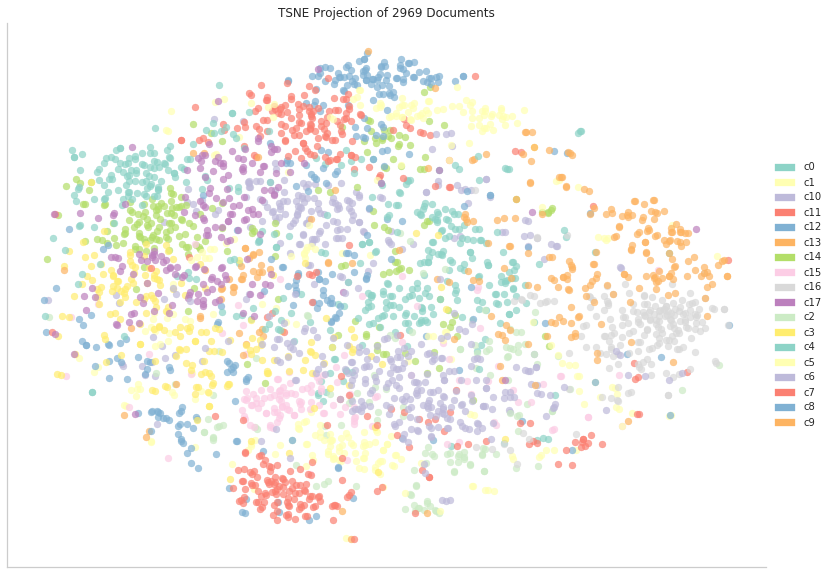

In [30]:
# derive clusters - there are 18 chapters in the book
clusters = KMeans(n_clusters=18)
clusters.fit(embeddings)

sns.set_palette(sns.color_palette("Set3", 18)) 
tsne = TSNEVisualizer()
tsne.fit(embeddings, ["c{}".format(c) for c in clusters.labels_])
ax = plt.gca()
ax.grid(alpha=.3)
sns.despine()
tsne.poof(ax=ax)
plt.show()

We see that when specifying 18 clusters *apriori* that some clusters do indeed emerge from these embeddings from a single piece of Henry David Thoreau's work (Walden).  This unsupervised learning technique was able to pick up on the embeddings and produce some reasonably homogenous-yet-separated clusters from the lines of this book, but how would it have done with a more traditional technique for transforming the text into a machine-interpretable form?

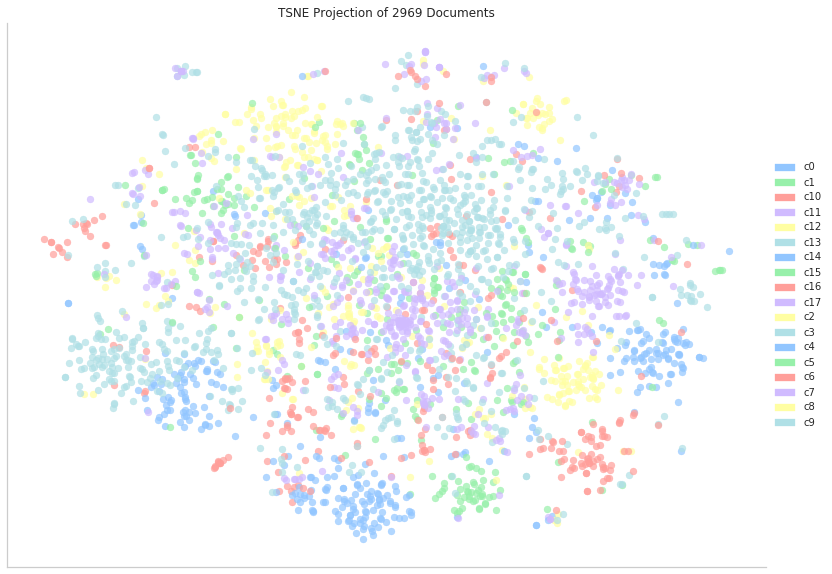

In [31]:
# transform combined_text
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=3, max_df=.95)
docs = tfidf.fit_transform(lines) 

# derive clusters
clusters = KMeans(n_clusters=18)
clusters.fit(docs)

sns.set_palette("pastel")
tsne = TSNEVisualizer()
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
ax = plt.gca()
ax.grid(alpha=.3)
sns.despine()
tsne.poof(ax=ax)
plt.show()

The more traditional `TfidfVectorizer` does a reasonable job as input data to `KMeans(n_clusters=18)` as well, however it is noted that the differences between clusters is more stark in some areas while other clusters are more spread apart.  This indicates the (somewhat expected) lack of nuiance and context in the TF-IDF data that is supplied by the sentence embeddings.  There isn't enough information to make that conclusion yet (though it is a reasonable hypothesis).

Future work might involve labeling each line with its chapter, then analyzing which approach better distinguished between the chapters.  This quick test isn't worth the work that would require.

## Build Neural Network To Classify NCCI Code Using ARTHUR Data

The Kaggle competition from Summer 2018 was the inspiration to dig deeper into this problem.  Universal Sentence Embeddings are a new tool to bring to bear on this problem, so setting a baseline of performance ought to be telling.  

In [15]:
def fetch_arthur():
  # read in training data from ARTHUR competition
  arthur = pd.read_csv("data/train_df.csv")
  print("Original data contains %i rows." %arthur.shape[0])

  # filter out duplicates of desc of ops
  arthur = arthur.drop_duplicates(subset="desc_of_operations")
  arthur = arthur.loc[~arthur.desc_of_operations.isnull()]

  # derive length of description & filter long/short ones
  arthur["len_description"] = arthur.desc_of_operations.apply(len)
  reasonable_sized_texts = (arthur.len_description.astype(int) >= 10) | (arthur.len_description.astype(int) <= 500)
  arthur = arthur.loc[reasonable_sized_texts]
  print("After filtering, the data contains %i rows." %arthur.shape[0])

  # clean text
  arthur["clean_desc_ops"] = TextCleaner(lemmatize=False).fit_transform(arthur.desc_of_operations.astype(str))

  return arthur

arthur = fetch_arthur()
arthur.head()

Original data contains 562988 rows.
After filtering, the data contains 342706 rows.
CHANGING URLS to TLDS...  REMOVING PUNCTUATION AND DIGITS... PARSING TEXT WITH SPACY... REMOVING STOP WORDS FROM DOCUMENTS... 

id target                                 desc_of_operations  \
0  14507  c5506  SUBMITTED BY COMMERCIAL INSURANCE SERVICES INC...   
1  14514  c7720  1111 audit: This policyholder holder is a muni...   
2  14543  c0251  OWN AND MAINTIAN AN IRRIGATION CANAL THAT DELI...   
3  14545  c0251  Website: www.northsterling.org The North Sterl...   
4  14551  c5506  UNDER LA JARA TOWN GOVERNMENT IN THE WHITE PAG...   

                          website           bus_eff_date  len_description  \
0                             NaN  1956-01-01 00:00:00.0               95   
1                             NaN  1956-01-01 00:00:00.0             1357   
2                             NaN  1975-08-19 00:00:00.0               76   
3  https://www.northsterling.org/  1956-01-01 00:00:00.0              560   
4                             NaN  1956-01-01 00:00:00.0               68   

                                      clean_desc_ops  
0  submitted commercial insurance services inc bu...  
1    audit policyholder holder municipal governme...  
2  maintian irrigation canal delivers water stock...  
3  website org north sterling irrigation district...  
4  la jara town government white pages   west   page

In [16]:
arthur.to_csv("arthur_clean.csv")

In [4]:
arthur = pd.read_csv("arthur_clean.csv")

# Build Classification Model Using a Keras Feed-forward Neural Network

Embeddings play nicely with neural networks, so we'll dive right in to a simple feed-forward architecture as a baseline model.  This quick & dirty model employs five layers of 512 computational units in each.  The approach employs a heavy-handed `dropout_rate` of `0.80`, employs `BatchNormalization` on most layers to improve training time, and uses a `LeakyReLU` activation function (versus a `ReLU`) at all layers except the output layer (where softmax is used due to the multi-class nature of this problem).  These design choices are arbitrary (insofar as they were determined by experience) and should be explored further by others who care enough to do so.  

In [20]:
# must pass as a list 
embeddings = fetch_universal_sentence_embeddings(arthur.clean_desc_ops.astype(str).tolist())

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/1'.
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 127.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 257.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 407.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 537.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 657.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 767.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 877.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/universal-sentence-encoder/1: 987.99MB
INFO:tensorflow:Downloaded https://tfhub.dev/google/universal-sentence-encoder/1, Total size: 993.26MB
INF

Let's pause and take a second to consider the nature of this problem.  This problem has strongly imbalanced classes wherein nearly 12% of observations are contained in the most populated class (which is combined from three classes).  

What might be the issue with classifying *this many classes* with such a strong imbalance?  


Note the uneven distribution of the classes!  Oh my GOODNESS!



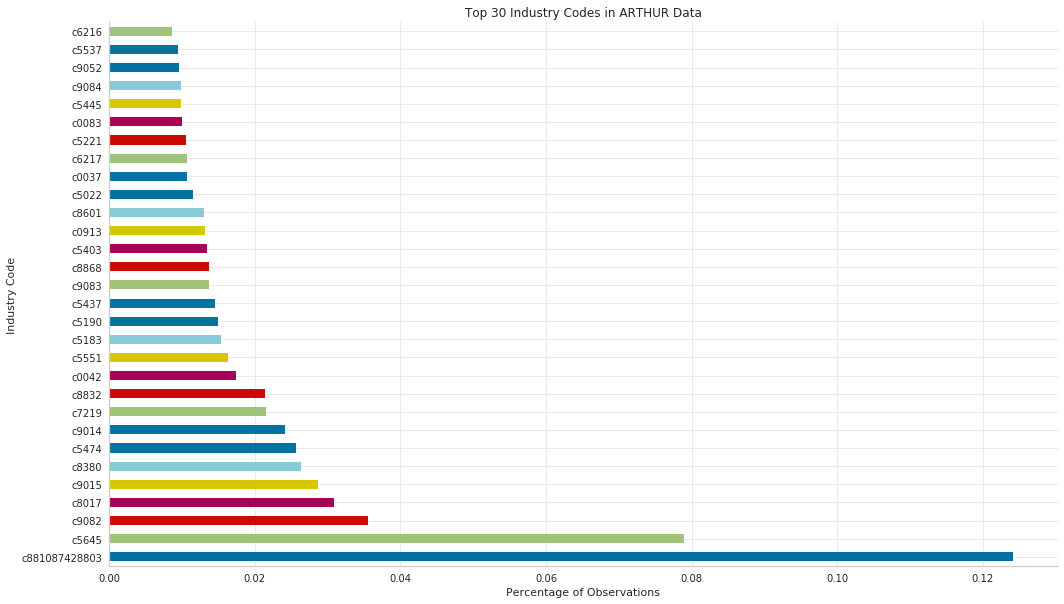

In [22]:
print("""
Note the uneven distribution of the classes!  Oh my GOODNESS!
""")
n = 30
fig, ax = plt.subplots()
(arthur.target.value_counts().head(n) / arthur.shape[0]).plot(ax=ax, kind="barh")
sns.despine()
ax.grid(alpha=.4)
ax.set_xlabel("Percentage of Observations")
ax.set_ylabel("Industry Code")
ax.set_title("Top {} Industry Codes in ARTHUR Data".format(n))
plt.show()

In [23]:
print("""
There are {} unique classes in this dataset.  

Food for thought:  what if in the future we had more?  Or less?  Or they changed?  Would the agorithm, which expects 293 classes of specific values, like this?
""".format(arthur.target.value_counts().count()))


There are 293 unique classes in this dataset.  

Food for thought:  what if in the future we had more?  Or less?  Or they changed?  Would the agorithm, which expects 293 classes of specific values, like this?



Below we do a bit of work to massage the data so it is ready to be fed into a neural network.  Since this is a classification problem we must generate a matrix (with 293 columns) that is one-hot encoded to represent the "ground truth" industry code.  

In [18]:
y = arthur.target.str.replace("c", "")
y = pd.get_dummies(y, drop_first=False)
y[:5]

0005  0008  0016  0034  0035  0036  0037  0042  0050  0079  0083  0106  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   0251  0913  0917  1015  1710  1803  2003  2014  2041  2070  2081  2089  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     1     0     0     0     0     0     0     0     0     0     0     0   
3     1     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   2095  2121  2130  2143  2157  2388  2413  2501  2503  2585  2586  2589  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   2688  2701  2702  2709  2710  2731  2759  2790  2799  2802  2841  2881  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   2883  2916  3030  3040  3041  3064  3076  3111  3113  3179  3257  3365  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   3372  3383  3400  3507  3574  3612  3620  3629  3632  3643  3681  3685  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   3724  3726  3808  3821  3824  3865  4000  4021  4034  4038  4061  4111  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   4130  4133  4149  4251  4299  4304  4307  4352  4360  4361  4410  4452  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   4459  4484  4511  4557  4583  4611  4635  4692  4693  4720  4740  4825  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0 

In [24]:
X, y = np.array(embeddings), y #arthur.desc_of_operations.astype(str).tolist()
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=7, stratify=y, train_size=.8)

In [25]:
y.shape

(342706, 293)

In [38]:
dropout_rate = .8
epochs = 100
activation = layers.LeakyReLU()
patience = 5

model = models.Sequential()

model.add(layers.Dense(512, input_shape=(X_train.shape[1], )))
model.add(layers.BatchNormalization())
model.add(activation)

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(activation)
model.add(layers.Dropout(dropout_rate))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(activation)
model.add(layers.Dropout(dropout_rate))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(activation)

model.add(layers.Dense(y_train.shape[1], activation='softmax'))

early = EarlyStopping(patience=patience)

model.summary()

model.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   epochs=epochs,
                   batch_size=128,
                   verbose=1,
                   validation_data=(X_val, y_val),
                   callbacks=[early])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
__________

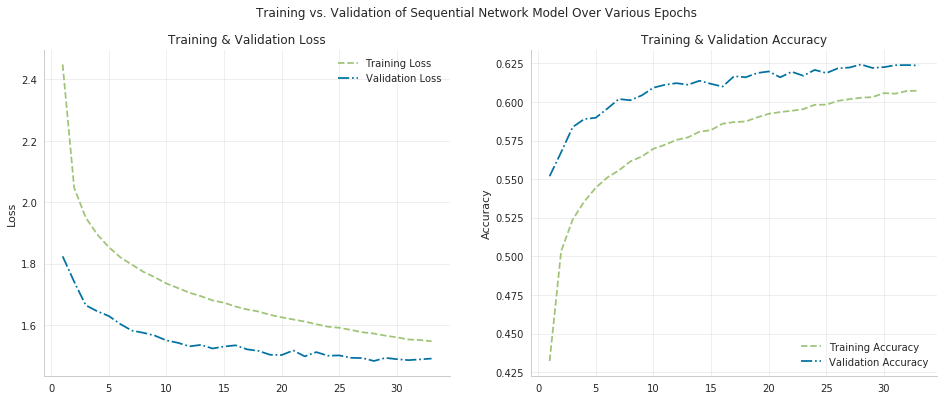

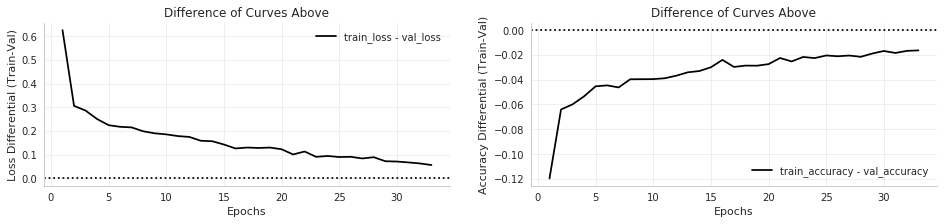

In [39]:
plot_accuracy_loss(history.history)

In [48]:
yhat_val = model.predict(X_val)
yhat_val = pd.DataFrame(yhat_val, columns=y.columns)
yhat_val[:5]

0005          0008          0016          0034          0035  \
0  1.358396e-08  4.619875e-09  2.987561e-11  3.152898e-09  3.923725e-09   
1  1.553098e-04  8.496982e-05  1.111991e-05  2.103253e-05  1.771332e-06   
2  4.532868e-04  3.179229e-05  6.880385e-06  2.951744e-05  3.107702e-04   
3  2.567782e-05  4.074846e-06  2.361495e-06  6.102147e-06  3.665566e-06   
4  5.251086e-05  1.277979e-05  4.383929e-07  2.746777e-05  2.145055e-04   

           0036          0037      0042          0050          0079      0083  \
0  5.660997e-08  1.031554e-07  0.000013  1.847939e-07  1.483005e-13  0.000002   
1  9.137987e-05  3.775090e-03  0.000736  5.686413e-03  2.943411e-06  0.005973   
2  2.485531e-04  8.488562e-04  0.000741  9.265412e-05  1.353401e-05  0.000997   
3  5.947214e-06  4.360378e-05  0.003343  1.507189e-04  2.657195e-08  0.000041   
4  5.481529e-06  7.678040e-05  0.003432  6.777314e-05  4.006574e-07  0.000029   

           0106          0251      0913      0917          1015          1710  \
0  5.524449e-07  1.377668e-08  0.000035  0.009960  1.167336e-10  4.829602e-11   
1  2.560990e-04  1.239095e-04  0.000067  0.000001  2.056505e-03  8.192286e-04   
2  5.356378e-05  1.397683e-06  0.024298  0.001256  2.758392e-05  2.978078e-06   
3  1.449145e-04  6.079174e-04  0.001070  0.041610  5.179753e-06  7.773488e-07   
4  2.200660e-05  1.231855e-06  0.000086  0.000235  4.040523e-06  2.605700e-06   

           1803          2003          2014          2041          2070  \
0  3.013267e-08  3.004159e-08  1.307388e-08  1.070779e-09  1.292263e-08   
1  8.640013e-07  8.056704e-07  4.769990e-04  9.089237e-07  1.968102e-06   
2  1.895709e-04  6.497820e-04  2.314460e-05  6.295306e-05  3.591746e-05   
3  3.604628e-07  2.620562e-06  3.480900e-06  7.754481e-07  3.951292e-06   
4  1.922928e-04  8.812900e-06  5.027510e-06  7.839338e-07  1.819482e-05   

           2081          2089          2095          2121          2130  \
0  1.475672e-09  1.920295e-08  2.381512e-09  4.999965e-13  6.605080e-13   
1  4.164294e-05  2.081725e-05  1.629769e-05  1.433131e-06  3.367986e-07   
2  1.010564e-04  6.392533e-05  1.481998e-04  5.176372e-05  5.973073e-05   
3  5.635219e-07  7.028554e-06  9.765185e-07  5.987662e-07  1.139985e-07   
4  1.942551e-06  1.224757e-05  3.778204e-06  3.650789e-06  1.323764e-05   

           2143          2157          2388          2413      2501  \
0  1.360973e-12  4.152124e-11  1.058004e-08  1.498694e-08  0.000003   
1  6.739356e-07  6.105589e-07  7.890151e-07  1.039414e-08  0.000018   
2  3.243450e-04  1.090561e-05  2.362167e-03  2.346284e-04  0.003655   
3  3.118176e-08  1.191383e-04  2.470184e-07  9.404400e-08  0.000045   
4  3.856877e-06  5.723452e-06  5.827639e-06  3.156353e-06  0.000200   

           2503      2585          2586      2589          2688          2701  \
0  7.151227e-09  0.897574  1.254154e-04  0.000641  3.701900e-09  4.748280e-12   
1  1.240358e-07  0.000002  5.688913e-07  0.000004  1.618316e-06  4.612633e-03   
2  6.230344e-04  0.001526  2.104379e-04  0.000629  1.598781e-04  5.982581e-07   
3  5.330555e-08  0.019734  2.342974e-03  0.025480  4.730498e-08  4.113249e-06   
4  9.827086e-06  0.004507  1.674367e-05  0.000084  6.097800e-07  1.535970e-07   

           2702          2709          2710          2731          2759  \
0  5.751103e-10  2.942119e-11  1.327014e-08  8.029863e-08  1.796124e-09   
1  4.323265e-03  4.833315e-03  1.000142e-03  5.668135e-05  2.796889e-05   
2  3.177553e-05  3.871673e-07  4.855837e-05  1.319617e-04  2.581759e-04   
3  2.461328e-05  3.629483e-06  3.256664e-06  4.890335e-07  2.289770e-06   
4  2.234099e-06  3.022721e-07  1.193933e-04  5.516334e-04  1.137325e-04   

           2790          2799          2802          2841          2881  \
0  2.724373e-09  2.762497e-09  7.242845e-08  3.556248e-09  3.632152e-07   
1  1.843183e-05  1.611343e-06  1.723587e-05  6.676233e-06  1.149075e-06   
2  4.486327e-04  6.382111e-05  1.134469e-03  7.119644e-05  6.084088e-03   
3  6.158613e-07  4.

In [50]:
yhat_val_vector = yhat_val.idxmax(axis=1)
yhat_val_vector[:10]

0            2585
1            7219
2    881087428803
3            9402
4            5479
5            7605
6            8380
7            5645
8    881087428803
9            9015
dtype: object

In [52]:
yval_vector = y_val.idxmax(axis=1)
yval_vector[:10]

138715    2585
119588    7219
227846    0913
454457    9402
188097    5479
114369    5190
98681     8380
140653    5645
256057    3681
206405    9015
dtype: object

In [53]:
# extract where diagonal is < 90% of the column's total
multiclass_confusion_matrix(yval_vector, yhat_val_vector, "Feed-forward Neural Network")

Condition_1  Condition_2  Condition_3  Condition_4  Condition_5  \
Test_1             29            0            1            0            2   
Test_2              0           13            0            1            2   
Test_3              1            0           42            0            1   
Test_4              0            0            0            7            0   
Test_5              6            2            1            0          112   
Test_6              0            0            0            0            0   
Test_7              7           48            2            2            3   
Test_8              9            4            3            0            5   
Test_9              0            0            0            0            0   
Test_10             0            0            0            0            0   
Test_11             0            1            0            0            0   
Test_12             0            0            0            0            0   
Test_13             0            0            0            0            0   
Test_14             0            1            0            0            0   
Test_15             0            0            0            0            0   
Test_16             0            0            0            0            0   
Test_17             0            0            0            0            0   
Test_18             0            0            0            0            0   
Test_19             0            0            0            0            1   
Test_20             0            0            0            0            0   
Test_21             0            0            0            0            0   
Test_22             0            0            0            0            0   
Test_23             0            0            0            0            0   
Test_24             0            0            0            0            0   
Test_25             0            0            0            0            0   
Test_26             0            0            0            0            0   
Test_27             0            0            0            0            0   
Test_28             0            0            0            0            0   
Test_29             0            0            0            0            0   
Test_30             0            0            0            0            0   
Test_31             0            0            0            0            0   
Test_32             0            0            0            0            0   
Test_33             0            0            0            0            0   
Test_34             0            0            0            0            0   
Test_35             0            0            0            0            0   
Test_36             0            0            0            0            0   
Test_37             0            0            0            0            0   
Test_38             0            0            0            0            0   
Test_39             0            0            0            0            0   
Test_40             0            0            0            0            0   
Test_41             0            0            0            0            0   
Test_42             0            0            0            0            0   
Test_43             0            0            0            0            0   
Test_44             0            0            0            0            0   
Test_45             0            0            0            0            0   
Test_46             0            0            0            0            0   
Test_47             0            0            0            0            0   
Test_48             0            0            0            0            0   
Test_49             0            0            0            0            0   
Test_50             0            0            0            0            0   
Test_51             0            0            0            0            0   
Test_5

## Compare Word Embeddings to Sentence Embeddings

In [35]:
sentences = []
for description in arthur.clean_desc_ops.astype(str).tolist():
    sentences.append(description.split())

w2v_model = gensim.models.Word2Vec(min_count=10, size=150, workers=4)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

(31378043, 35496165)

Quick sanity check:

In [36]:
topn = 20

dat = w2v_model.most_similar(['geological'], topn=topn)
dat = pd.DataFrame(dat, columns=['word', 'prob']).set_index('word')
dat

prob
word                      
geologic          0.855483
enviromental      0.848539
geophysical       0.840270
geology           0.835007
mapping           0.827245
archaeological    0.781080
geologist         0.772548
seismic           0.771245
gis               0.758426
geologists        0.755906
analyzing         0.745106
surveys           0.732910
analysis          0.732376
characterization  0.721100
survey            0.717951
mudlogging        0.716222
topographic       0.710002
environmental     0.708899
surveying         0.708881
archeological     0.707587

In [40]:
w2v_model.wv.word_vec('dog')

array([-0.8837642 ,  2.350649  ,  0.4280968 ,  0.09722082, -1.194065  ,
       -0.31138867, -1.8555651 ,  0.13797593, -0.6539688 , -0.01542996,
        0.3223152 , -2.5366507 ,  1.0744275 , -1.6043487 ,  1.321407  ,
        1.2095217 , -2.0177565 ,  0.98294854,  0.72625726, -0.91424656,
        1.1047925 , -1.2515937 , -1.7224162 , -0.51957405,  0.5078095 ,
        1.451846  ,  0.8624084 ,  1.3763374 ,  0.96985245, -1.7067822 ,
        0.5914478 ,  0.14058553,  0.10157563, -0.65853983,  1.6845003 ,
        1.1396058 , -0.6758901 ,  1.0611577 , -0.42349514, -0.21692733,
        0.25424674, -1.6665393 , -0.65192413, -0.98377967,  0.7800386 ,
        1.5793717 , -1.908976  , -0.29790303,  0.561157  ,  1.4830953 ,
        0.27451256,  0.8485796 , -1.3153017 ,  1.2227341 ,  2.3832686 ,
       -0.31800938, -1.8563945 , -0.47814518, -1.5176722 , -2.4155781 ,
       -0.1814412 , -1.2185687 ,  1.5524232 ,  0.6539349 , -0.26391873,
       -0.25253093, -0.1167855 ,  1.6866913 ,  0.71569806,  0.00

In [45]:
arthur.clean_desc_ops.head(1).str.split().tolist()[0]

['submitted',
 'commercial',
 'insurance',
 'services',
 'inc',
 'business',
 'insurance',
 'services',
 'recd']

In [46]:
[w2v_model.wv.word_vec(word) for word in arthur.clean_desc_ops.head(1).str.split().tolist()[0]]

[array([ 9.93187070e-01,  1.15571940e+00,  1.01466894e+00, -8.97320211e-01,
         5.17066717e-01,  7.82425582e-01,  4.36988592e-01,  1.13105226e+00,
         8.23343158e-01,  3.30389768e-01,  9.05410290e-01,  2.91133595e+00,
        -8.37304056e-01,  9.50854242e-01,  1.57181656e+00, -4.13481921e-01,
         8.06489959e-02, -8.22088063e-01, -1.38827837e+00,  5.33696562e-02,
        -2.01283932e+00,  1.16551006e+00, -4.00982112e-01, -5.46636343e-01,
        -1.96758687e-01,  1.63447857e+00, -1.19087780e+00, -2.48654217e-01,
        -5.81755221e-01, -1.42443550e+00, -1.78219676e+00, -1.70292348e-01,
         6.57907903e-01,  1.24644384e-01, -1.35607255e+00,  9.63471889e-01,
         1.49682271e+00, -6.34040534e-01, -8.03315878e-01, -7.11620688e-01,
         2.91623378e+00, -4.29287016e-01, -8.33663270e-02, -6.24072492e-01,
        -9.47161913e-02,  1.25294399e+00, -3.23585957e-01, -1.26726222e+00,
        -2.97683537e-01, -1.06274104e+00,  1.39717579e+00, -5.66786110e-01,
        -2.5

In [ ]:
topn = 20

dat = w2v_model.wv.word_vec(analogies=)#(['geological'], topn=topn)
dat = pd.DataFrame(dat, columns=['word', 'prob']).set_index('word')
dat

In [62]:
clf = LinearSVC()
clf.fit(embed_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [64]:
def multiclass_confusion_matrix(y, yhat, model_name='unspecified',
                               verbose=0):
    '''
    Inputs:
    ------------------------------------------------------
    y: true labels 
    yhat: predicted labels 
    model_name: name of model for printing
    
    Outputs:
    ------------------------------------------------------
    cm: confusion matrix (easily readable)
    metrics: dict of metrics on multiclass classification
    '''
    # organize confusion matrix from sklearn into readable format
    sk_confusion_matrix = confusion_matrix(y, yhat).transpose()#; print(sk_confusion_matrix)
    
    # put in pd.DataFrame and add names
    cm = pd.DataFrame(sk_confusion_matrix)
    IX = ['Test_' + str(i+1) for i in cm.index]
    COLS = ['Condition_' + str(i+1) for i in cm.columns]
    cm.columns, cm.index = COLS, IX
    
    # add totals
    cm['Total'] = cm.sum(axis=1)
    cm.loc['Total'] = cm.sum(axis=0)
    
    # get performance scores
    N = cm.loc['Total', 'Total']
    TP = np.diag(cm.loc[IX, COLS]).sum()
    ACC = np.divide(TP, N)
    MCR = 1 - ACC
    
    if verbose:
        print('''
        Confusion Matrix for Model: %s
        ------------------------------------------------------''' %model_name)
        print(cm)
        print('''
        Metrics for Model: %s
        ------------------------------------------------------
        Accuracy Rate = %.5f
        Misclassification Rate = %.5f
        ''' %(model_name, ACC, MCR))
        return None

    return cm


def train_val_metrics(grid, X_train, X_val, y_train, y_val):
    # check train data
    y_pred_train, y_pred_val = grid.predict(X_train), grid.predict(X_val)

    train_acc, train_f1 = accuracy_score(y_pred_train, y_train), f1_score(y_pred_train, y_train, average='macro')
    print('''
    Training Accuracy = %.4f
    Training F1 Score = %.4f
    ''' %(train_acc, train_f1))

    _1 = multiclass_confusion_matrix(y_train, y_pred_train)

    skplt.metrics.plot_roc_curve(y_train, grid.predict_proba(X_train))
    ax = plt.gca()
    ax.set_title('Training Results')
    plt.show()
    
    # check validation data 
    val_acc, val_f1 = accuracy_score(y_pred_val, y_val), f1_score(y_pred_val, y_val, average='macro')

    print('''
    Validation Accuracy = %.4f
    Validation F1 Score = %.4f
    ''' %(val_acc, val_f1))

    _2 = multiclass_confusion_matrix(y_val, y_pred_val)

    skplt.metrics.plot_roc_curve(y_val, grid.predict_proba(X_val))
    ax = plt.gca()
    ax.set_title('Validation Results')
    plt.show()
    
    return _1, _2


In [65]:
embed_val = fetch_universal_sentence_embeddings(X_val)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [68]:
train_val_metrics(clf, embed_train, embed_val, y_train, y_val)

/Users/washburp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



    Training Accuracy = 0.6212
    Training F1 Score = 0.4579
    

        Confusion Matrix for Model: unspecified
        ------------------------------------------------------
          Condition_1  Condition_2  Condition_3  Condition_4  Condition_5  \
Test_1            137            1            0            0           17   
Test_2              1          111            1            1            6   
Test_3              1            4          177            0            0   
Test_4              0            0            0           49            0   
Test_5             23            7            2            1          632   
Test_6              0            0            0            0            0   
Test_7             15          147           17            2           13   
Test_8             46            6            2            0           17   
Test_9              0            0            0            0            0   
Test_10             0            1            0   

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [46]:
class UniversalSentenceEmbeddingTransformer(TransformerMixin, BaseEstimator):

    def fetch_universal_sentence_embeddings(self, messages, verbose=0):
        """Fetches universal sentence embeddings from Google's
        research paper https://arxiv.org/pdf/1803.11175.pdf.
        INPUTS:
        RETURNS:
        """
        module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

        # Import the Universal Sentence Encoder's TF Hub module
        embed = hub.Module(module_url)

        with tf.Session() as session:
            session.run([tf.global_variables_initializer(), tf.tables_initializer()])
            message_embeddings = session.run(embed(messages))
            embeddings = list()
            for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
                if verbose:
                    print("Message: {}".format(messages[i]))
                    print("Embedding size: {}".format(len(message_embedding)))
                    message_embedding_snippet = ", ".join(
                        (str(x) for x in message_embedding[:3]))
                    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))
                embeddings.append(message_embedding)
        return embeddings
    
    def fit(self, X, y=None):
        """interface conforming, and allows use of fit_transform"""
        return self
    
    def transform(self, X):
        return self.fetch_universal_sentence_embeddings(messages=X)

In [47]:
## Feature union with tfidf and embeddings
from sklearn.pipeline import FeatureUnion

# specify pipeline params
params = {'clf__C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 
          'clf__random_state': [7]}

# create pipeline
pipeline = Pipeline([
    ('encode', UniversalSentenceEmbeddingTransformer()),
    ('clf', LinearSVC()) 
])

# fit pipeline
grid = GridSearchCV(pipeline, params, verbose=1, n_jobs=-1)
grid = grid.fit(X_train, y_train)

/Users/washburp/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


TypeError: Can't convert 'text': data type not understood

# References

- [Universal Sentence Encoder (paper)](https://arxiv.org/pdf/1803.11175.pdf)
- [Google's Universal Sentence Encoder (TensorFlow Hub)](https://tfhub.dev/google/universal-sentence-encoder/2)
- [Colab Notebook with Examples](https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb#scrollTo=pxe8MsCfFcy7)
- [TensorFlow Embedding Documentation](https://www.tensorflow.org/guide/embedding)
- [The Current Best of Universal Word Embeddings and Sentence Embeddings](https://medium.com/huggingface/universal-word-sentence-embeddings-ce48ddc8fc3a)
- [Introducing state of the art text classification with universal language models](http://nlp.fast.ai/classification/2018/05/15/introducting-ulmfit.html)